# Tổ chức lại bảng dữ liệu

Dữ liệu mà ta gặp phải thường không ở dạng (shape) mà chúng ta mong muốn. Các thao tác reshaping dữ liệu nhằm mục đích khiến nó dễ dàng để quan sát mối quan hệ, tương quan của các cặp dữ liệu.

In [1]:
import pandas as pd

### .pivot( index = None, columns = None, values = None )

Ví dụ một công ty sản xuất 3 sản phẩm và số lượng sản phẩm bán được mỗi năm khác nhau như dữ liệu sau đây:

In [2]:
df = pd.DataFrame( [[2011, 'Iphone', 10000], [2011, 'SS', 30000], [2011, 'LG', 123000], \
                    [2012, 'SS', 134500], [2012, 'LG', 90000], [2012, 'Iphone', 23400], [2013, 'Iphone', 56000], \
                    [2013, 'LG', 234000], [2013, 'SS', 1234567]], 
                  columns = ['Year', 'Product', 'Turnover'] )
df

,Year,Product,Turnover
0,2011,Iphone,10000
1,2011,SS,30000
2,2011,LG,123000
3,2012,SS,134500
4,2012,LG,90000
5,2012,Iphone,23400
6,2013,Iphone,56000
7,2013,LG,234000
8,2013,SS,1234567


Khi muốn so sánh số liệu bán hàng của mỗi sản phẩm qua các năm thì cách biểu diễn trên là không tốt. 
Như vậy mong muốn chuyển đổi dữ liệu trên thành dạng như sau:

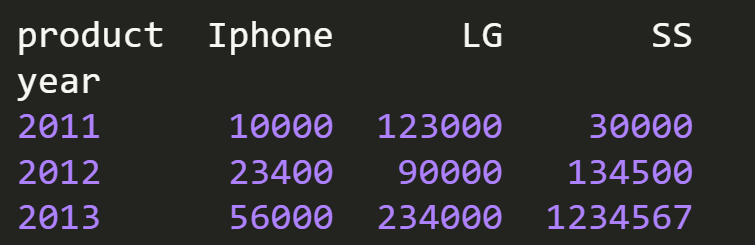

Pandas đã cung cấp một phương thức giúp ta thay đổi shape của dữ liệu như trên đó là **.pivot( index = None, columns = None, values = None )**. 



In [3]:
df.pivot(index = 'Year', columns = 'Product', values = 'Turnover')

Product,Iphone,LG,SS
Year,,,
2011,10000,123000,30000
2012,23400,90000,134500
2013,56000,234000,1234567


Lưu ý nhỏ ở đây là nếu **values** không được chỉ định rõ ràng, tất cả các cột còn lại sẽ được sử dụng và kết quả sẽ có các cột được lập chỉ mục theo thứ bậc. 

In [4]:
df.pivot(index = 'Year', columns = 'Product')

Turnover                 
Product   Iphone      LG       SS
Year                             
2011       10000  123000    30000
2012       23400   90000   134500
2013       56000  234000  1234567

Chúng ta cũng có thể tạo ra multi-level index sử dụng set_index() trước đó:

In [5]:
df.set_index(['Year', 'Product'], inplace = True)
df

Turnover
Year Product          
2011 Iphone      10000
     SS          30000
     LG         123000
2012 SS         134500
     LG          90000
     Iphone      23400
2013 Iphone      56000
     LG         234000
     SS        1234567

### .unstack( level = -1, fill_value = None ) 
### .stack( level = -1, dropna = True )

Giả sử đầu vào dữ liệu lại thuộc dạng multi-level index:

In [6]:
save_multi_index = df
df

Turnover
Year Product          
2011 Iphone      10000
     SS          30000
     LG         123000
2012 SS         134500
     LG          90000
     Iphone      23400
2013 Iphone      56000
     LG         234000
     SS        1234567

thì phương thức **.pivot()** không thể **rearrange** các cột của một dataframe. Như vậy bài toán hiện tại là cần phải chuyển một vài index level về column level. Để làm được điều này thì có thể sử dụng phương thức:

**.unstack( level = -1, fill_value = None )**

Level nhận giá trị default là -1 ứng với last level.



In [7]:
df.unstack(level = 'Year')

Turnover                 
Year        2011    2012     2013
Product                          
Iphone     10000   23400    56000
LG        123000   90000   234000
SS         30000  134500  1234567

Dữ liệu được chuyển đổi từ **long dataframe** thành **wider dataframe**

Và ngược với bài toán cần đến **unstack** là bài toán cần chuyển một vài **column level** thành **index level** khiến dữ liệu từ **wide dataframe** thành dạng **longer dataframe**.

Ví dụ cần chuyển **wide dataframe** sau thành dạng **longer dataframe**

In [8]:
df_wide = df.unstack( level = "Product" )
df_wide

Turnover                 
Product   Iphone      LG       SS
Year                             
2011       10000  123000    30000
2012       23400   90000   134500
2013       56000  234000  1234567

In [9]:
df_long = df_wide.stack( level = "Product" )
df_long

Turnover
Year Product          
2011 Iphone      10000
     LG         123000
     SS          30000
2012 Iphone      23400
     LG          90000
     SS         134500
2013 Iphone      56000
     LG         234000
     SS        1234567

### .swaplevel( i = -2, j = -1, axis = 0 )

**unstack()** và **stack()** giúp ta chuyển đổi qua lại giữa **multi-level index** và **multi-level column**. Ngoài ra ta còn một chuyển đổi khác đó là hoán đổi vị trí của các **index levels**, lúc đó ta cần dùng đến **swaplevel()** 

In [10]:
df = save_multi_index
df

Turnover
Year Product          
2011 Iphone      10000
     SS          30000
     LG         123000
2012 SS         134500
     LG          90000
     Iphone      23400
2013 Iphone      56000
     LG         234000
     SS        1234567

In [11]:
df.swaplevel(0,1)
# = df.swaplevel("Year","Product")

Turnover
Product Year          
Iphone  2011     10000
SS      2011     30000
LG      2011    123000
SS      2012    134500
LG      2012     90000
Iphone  2012     23400
        2013     56000
LG      2013    234000
SS      2013   1234567

Hoặc là kết hợp với **.sort_index()**

In [12]:
df.swaplevel("Year","Product").sort_index()

Turnover
Product Year          
Iphone  2011     10000
        2012     23400
        2013     56000
LG      2011    123000
        2012     90000
        2013    234000
SS      2011     30000
        2012    134500
        2013   1234567

Kết luận:
* Có thể thay đổi *shape* của dữ liệu với hàm **.pivot()**, 
* Chuyển đổi qua lại giữa *multi-level index* và *multi-level column* với **.unstack()** và **.stack()** 
* Hoán đổi vị trí của các *index levels* với **.swaplevel()**.